<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

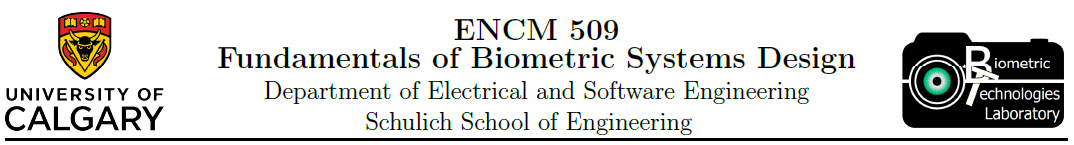

<center>
    <h1>Laboratory Experiment #3</h1>
    <h2>Biometric-based verification: Signature</h2>
</center>

# Lab 3 - Report 

#### UCID 1: 30085789
#### Name 1: Abhay Khosla

#### UCID 2: 30096001
#### Name 2: Parbir Lehal

#### Group Number: 07

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

## Introduction
In this lab we explore the use of biometric-based verification by taking a closer look into signatures we collected in Lab 2. We will be using the same dataset as in Lab 2, which consists of 30 genuine word written and 30 forged word written. The word written was "labs". We will also use a statistical tool that we have learned in the lectures Gaussian Mixture Model which will help us classify and analyze the data. Most of the code is given to us with implementing Gaussian Mixture Model and we will learn how to distinguish between genuine and forged dataset with using metrics such as False Acceptance Rate (FAR) and False Rejection Rate (FRR). Through this lab report we will be able to understand how biometric-based verification works and how it can be used in real life applications. In all, the Gaussian Mixture Model will help us classify the data and we will be able to see how accurate the model is by using the metrics mentioned above.

In [2]:
# Required libraries for Lab 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [12]:
def Gausian_mixture_plot (training_patterns, training_components, auth_lst, imp_lst):

    # to store all the scores calculated
    aScores = []

    # number of signature samples to use for training the models
    NUMTRAININGPATTERNS = training_patterns
    # number of Gaussian mixture components in the GMM
    NUMGCOMPONENTS = training_components
    total_signatures = 30
    numForgedSigs = 30

    train_set = np.reshape(auth_lst[0], (-1,4))

    # this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
    # this matrix, stored in the varaible "train_set" will be used for the training
    for i in range(1,NUMTRAININGPATTERNS):
        # taking from authentic/genuine
        sample = np.reshape(auth_lst[i], (-1,4))
        train_set = np.concatenate((train_set, sample), axis=0)

    gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

    # to store all the scores calculated
    aScores = []
    
    # going through the remaining signatures after removing the first 20 for training
    for i in range(NUMTRAININGPATTERNS, total_signatures):
        # taking from authentic/genuine
        sample =  np.reshape(auth_lst[i], (-1,4))
        # compute the per-sample average log-likelihood of the given data.
        score = gmm.score(sample)
        # print('%d: %.4f' % (i, score))
        # add the score calculated to the list aScores
        aScores.append(score)


    fScores = []
    for i in range(numForgedSigs):
        # taking from the impostor
        sample =  np.reshape(imp_lst[i], (-1,4))
        score = gmm.score(sample)
        # print('%d: %.4f' % (i, score))
        fScores.append(score)

    # authentic set
    aMu = np.mean(aScores)
    aStd = np.std(aScores)
    
    
    # impostor set
    fMu = np.mean(fScores)
    fStd = np.std(fScores)
    
    print('Average of authentic scores: %.4f' % (aMu))
    print('Std of authentic scores: %.4f' % (aStd))
    print('Average of forgery scores: %.4f' % (fMu))
    print('Std of forgery scores: %.4f' % (fStd))
    
    
    # change this range for your set
    x = np.arange(-60, 0, 0.01)
    
    aProb = norm.pdf(x, loc=aMu, scale=aStd)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)
    
    plt.figure(figsize=(20,4))
    
    
    plt.subplot(1,3,1)
    plt.plot(x, aProb, 'g')
    plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    plt.plot(x, fProb, 'r')
    plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    plt.legend()
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
    
    # Authentic set
    x = np.arange(-40, -10, 0.01)
    aProb = norm.pdf(x, loc=aMu, scale=aStd)
    
    plt.subplot(1,3,2)
    plt.plot(x, aProb, 'g')
    plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    plt.legend()
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
       
    # Forged (impostor) set
    x = np.arange(-200, 50, 0.01)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)
    
    plt.subplot(1,3,3)
    plt.plot(x, fProb, 'r')
    plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    plt.legend()
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
    

**Exercise 1** (4 marks): Create  your own data (three sets of signatures recorded as `.csv` files), or the data provided on D2L. Use the sample Notebook file `Lab3-SigVerif GMM.ipynb`  to classify set 1 (genuine) and set 2 (impostor). Follow the instructions described in  Section 2.2 and repeat this process for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. Include the 4 sets of distribution plots (figures) for your report. Include a brief analysis of how varying the above parameters influence  the classification results.
		
Plot the matching scores' PDFs of the *authentic* (genuine) and *forged* (impostor) sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Use two other different sets of parameters, see the difference of plotting the pair of curves (authentic and impostor) together and separately. 

## Loading the word "labs" dataset

In [6]:
# We are using the word "labs"
base_dir = './signature_samples/labs/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_impostor = base_dir + 'impostor/'

# amount of signatures to be loaded
total_signatures = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

In [7]:
print('Size of the "auth_lst" vector: %d' % (len(auth_lst)))
print('Size of the "imp_lst" vector: %d' % (len(imp_lst)))

Size of the "auth_lst" vector: 30
Size of the "imp_lst" vector: 30


### Parameter #1 (Number of Signatures: 20, Number of Gaussian Mixture Components: 20)

Average of authentic scores: -17.5125
Std of authentic scores: 0.5054
Average of forgery scores: -32.5444
Std of forgery scores: 2.2228


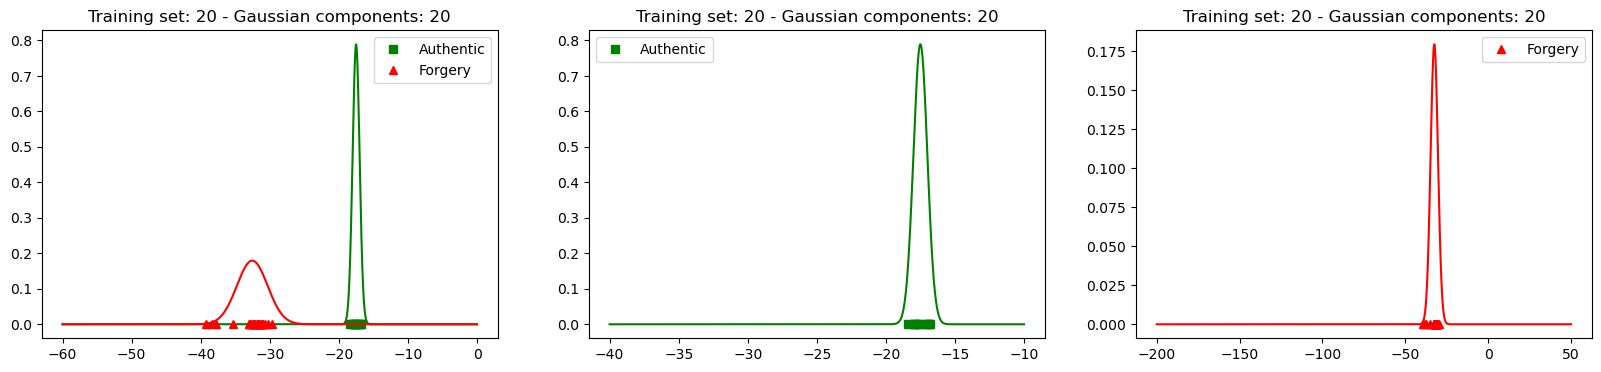

In [9]:
Gausian_mixture_plot(20, 20, auth_lst, imp_lst)

### Parameter #2 (Number of Signatures: 20, Number of Gaussian Mixture Components: 40)

Average of authentic scores: -17.6525
Std of authentic scores: 0.6513
Average of forgery scores: -37.6170
Std of forgery scores: 4.3575


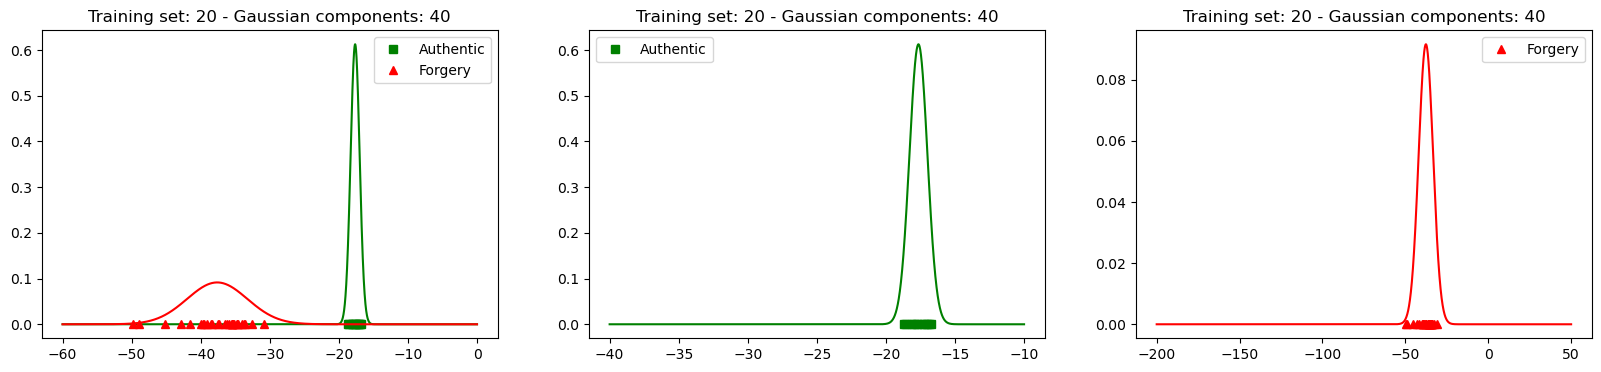

In [34]:
Gausian_mixture_plot (20, 40, auth_lst, imp_lst)

### Parameter #3 (Number of Signatures: 10, Number of Gaussian Mixture Components: 20)

Average of authentic scores: -19.8542
Std of authentic scores: 1.3305
Average of forgery scores: -36.5620
Std of forgery scores: 1.9507


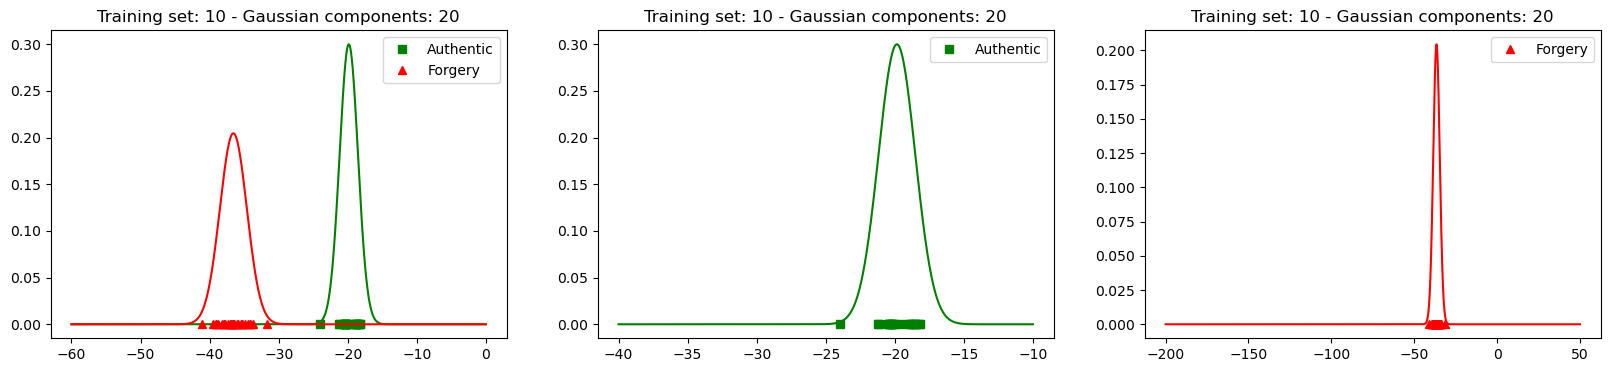

In [35]:
Gausian_mixture_plot (10, 20, auth_lst, imp_lst)

The reason why we reused this function again is because we had to look at our scores from the algorithm and then based on the lowest score we get that was our x-range hence fixing our plot issue from the -60.

### Parameter #4 (Number of Signatures: 10, Number of Gaussian Mixture Components: 40)

In [17]:
# to store all the scores calculated
aScores = []

# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 10
# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40
total_signatures = 30
numForgedSigs = 30

train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    # print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)


fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)


# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Std of authentic scores: %.4f' % (aStd))
print('Average of forgery scores: %.4f' % (fMu))
print('Std of forgery scores: %.4f' % (fStd))

0: -40.9238
1: -41.4300
2: -40.3578
3: -42.5366
4: -42.4420
5: -40.9634
6: -42.4026
7: -37.5217
8: -42.3489
9: -54.1976
10: -51.8818
11: -64.0267
12: -46.0732
13: -42.6365
14: -47.2661
15: -54.9270
16: -50.3924
17: -47.4494
18: -46.1310
19: -41.6207
20: -51.5156
21: -43.2610
22: -41.9922
23: -37.3817
24: -45.3689
25: -45.7830
26: -44.4216
27: -47.6604
28: -45.3800
29: -120.9077
Average of authentic scores: -26.1298
Std of authentic scores: 15.0074
Average of forgery scores: -48.0400
Std of forgery scores: 14.6142


Text(0.5, 1.0, 'Training set: 10 - Gaussian components: 40')

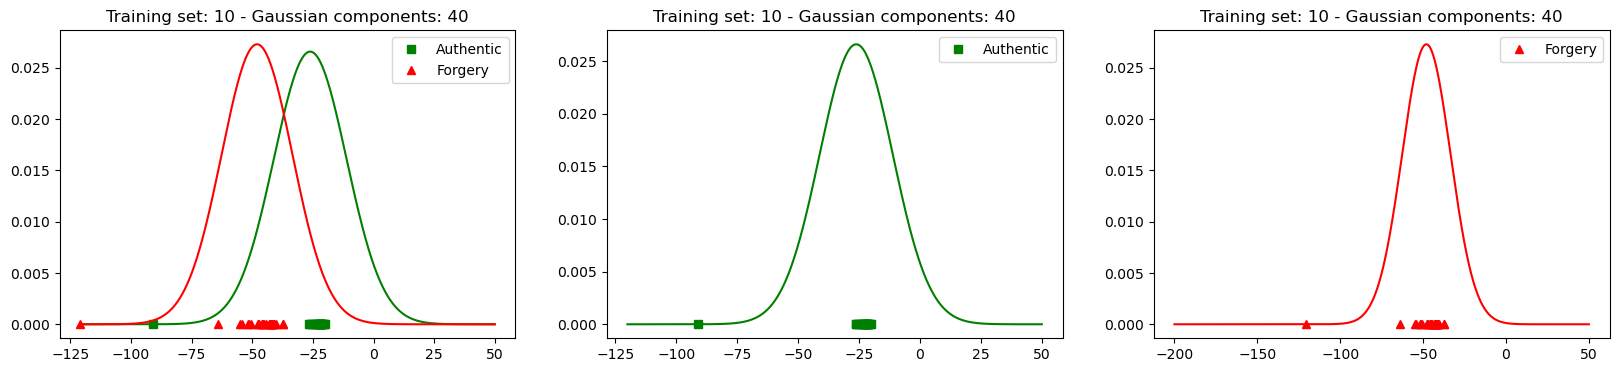

In [22]:
# change this range for your set
x = np.arange(-120, 50, 0.01) # Our lowest score from above is 29: -120.9077

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.figure(figsize=(20,4))


plt.subplot(1,3,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

# Authentic set
x = np.arange(-120, 50, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,3,2)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
    
# Forged (impostor) set
x = np.arange(-200, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,3,3)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

### Analysis for Genuine Signatures
- The first pair (20, 20) is the default pair given to us in the notebook. The second pair (20, 40) is the same as the first pair but with more Gaussian mixture components. The third pair (10, 20) is the same as the first pair but with less signatures used for training. The fourth pair (10, 40) is the same as the second pair but with less signatures. 
- With the (20, 20) and (20, 40) pairs, where the training set size is constant, the increase in Gaussian components has led to a broader distribution in the plots. This suggests that the model might be capturing more noise in the data, which can either indicate better fitting to complex patterns or potentially over fitting.
- When comparing (10, 20) to (20, 20), the reduction in training signatures seems to have wider distributions, meaning a decrease in the model's confidence. This could be a result of the model having less data to learn from, hindering its ability to generalize.
- The (10, 20) and (10, 40) pairs, we can see that a smaller training set size could be less effective at capturing the complexities of genuine and forged words written, regardless of the number of Gaussian components. This is illustrated by the wider distributions, which could be because that the model is over-parameterized for the amount of data available.
- The increase in standard deviation across all comparisons as the number of Gaussian components increases suggests a more dispersed data representation. 
- In conclusion, the relationship between the number of training dataset and Gaussian components is not linear, and their balance is crucial for model performance. 

**Exercise 2** (4 marks): Consider the genuine set and the second set of impostor signatures that are very different (in shape, length, i.e. a different writing or another person signature). 
Repeat the process as described  in Exercise 1,  for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. 
Plot the matching scores' PDFs of the *authentic*  (genuine) and *impostor* sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Compare these results against the results of Exercise 1.

## Loading the word "four" dataset for second set of impostor and the word "labs" for genuine 

In [3]:
base_dir_authentic = './signature_samples/labs/' #Using the data of the word 'labs' 
base_dir_different = './signature_samples/four/' #Using the second set of impostor signatures(word) which is different from labs which is "four"

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir_authentic + 'genuine/'
dir_different = base_dir_different + 'impostor/'

# amount of signatures to be loaded
total_signatures = 30

# lists to store the loaded signatures
auth_lst = []
diff_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_diff = pd.read_csv(dir_different + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    diff_lst.append(csv_diff.values)

In [6]:
print('Size of the "auth_lst" vector: %d' % (len(auth_lst)))
print('Size of the "diff_lst" vector: %d' % (len(diff_lst)))

Size of the "auth_lst" vector: 30
Size of the "diff_lst" vector: 30


### Parameter #1 (Number of Signatures: 20, Number of Gaussian Mixture Components: 20)

In [8]:
# to store all the scores calculated
aScores = []

# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 20
# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 20
total_signatures = 30
numForgedSigs = 30

train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    # print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)


fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(diff_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)


# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Std of authentic scores: %.4f' % (aStd))
print('Average of forgery scores: %.4f' % (fMu))
print('Std of forgery scores: %.4f' % (fStd))

0: -27.3520
1: -36.5913
2: -32.8211
3: -25.7946
4: -25.1138
5: -24.1181
6: -24.5185
7: -34.2961
8: -32.3650
9: -30.6533
10: -32.0332
11: -31.6293
12: -32.3025
13: -31.4002
14: -32.3658
15: -32.5182
16: -33.9247
17: -32.6104
18: -31.3021
19: -32.7318
20: -33.8096
21: -32.0149
22: -32.2070
23: -33.0862
24: -33.9674
25: -31.4750
26: -31.5734
27: -32.2280
28: -34.5412
29: -32.6675
Average of authentic scores: -17.3907
Std of authentic scores: 0.4711
Average of forgery scores: -31.4671
Std of forgery scores: 2.9886


Text(0.5, 1.0, 'Training set: 20 - Gaussian components: 20')

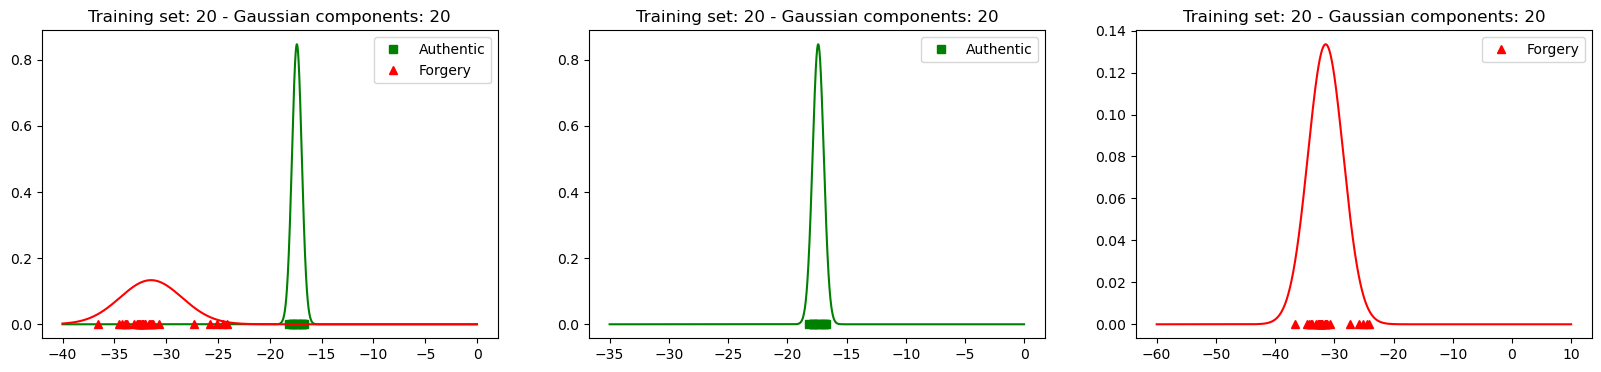

In [9]:
# change this range for your set
x = np.arange(-40, 0, 0.01) # Our lowest score from above is 1: -36.5913

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.figure(figsize=(20,4))


plt.subplot(1,3,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

# Authentic set
x = np.arange(-35, 0, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,3,2)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
    
# Forged (impostor) set
x = np.arange(-60, 10, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,3,3)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

### Parameter #2(Number of Signatures: 20, Number of Gaussian Mixture Components: 40)

In [10]:
# to store all the scores calculated
aScores = []

# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 20
# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40
total_signatures = 30
numForgedSigs = 30

train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    # print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)


fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(diff_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)


# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Std of authentic scores: %.4f' % (aStd))
print('Average of forgery scores: %.4f' % (fMu))
print('Std of forgery scores: %.4f' % (fStd))

0: -32.3632
1: -47.6450
2: -38.8738
3: -26.7340
4: -27.8725
5: -26.2998
6: -26.7884
7: -40.5194
8: -40.9499
9: -37.4506
10: -40.9065
11: -41.8521
12: -41.6439
13: -39.7958
14: -39.5159
15: -41.7105
16: -39.2149
17: -41.9203
18: -39.2111
19: -43.2122
20: -46.0792
21: -42.1074
22: -41.6143
23: -41.1592
24: -40.6628
25: -36.3892
26: -38.2211
27: -39.4118
28: -45.1112
29: -37.8076
Average of authentic scores: -17.6469
Std of authentic scores: 0.6792
Average of forgery scores: -38.7681
Std of forgery scores: 5.4288


Text(0.5, 1.0, 'Training set: 20 - Gaussian components: 40')

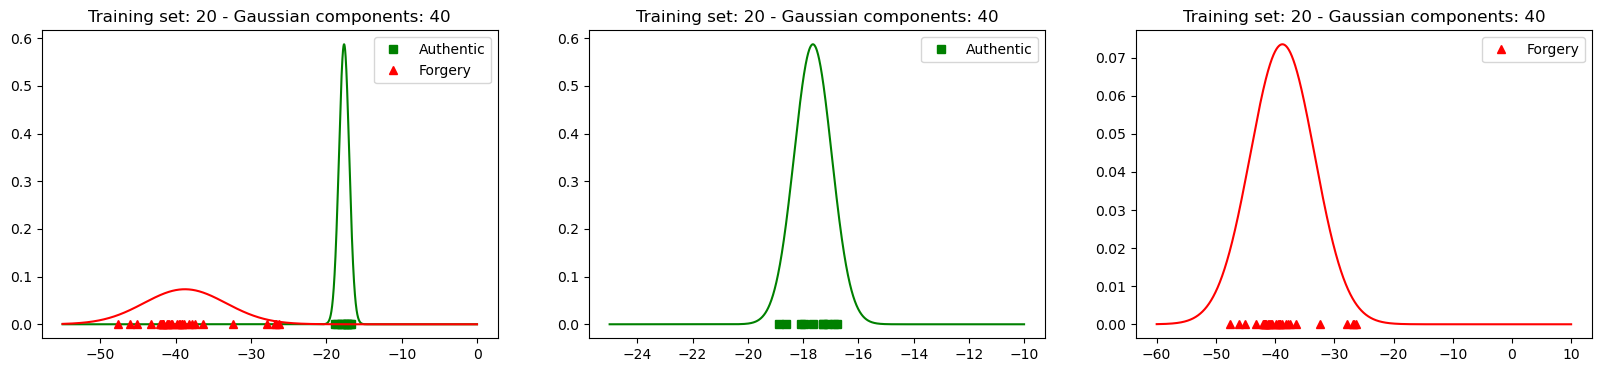

In [12]:
# change this range for your set
x = np.arange(-55, 0, 0.01) # Our lowest score from above is 1: -47.6450

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.figure(figsize=(20,4))


plt.subplot(1,3,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

# Authentic set
x = np.arange(-25, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,3,2)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
    
# Forged (impostor) set
x = np.arange(-60, 10, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,3,3)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

### Parameter #3(Number of Signatures: 10, Number of Gaussian Mixture Components: 20)

In [13]:
# to store all the scores calculated
aScores = []

# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 10
# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 20
total_signatures = 30
numForgedSigs = 30

train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    # print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)


fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(diff_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)


# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Std of authentic scores: %.4f' % (aStd))
print('Average of forgery scores: %.4f' % (fMu))
print('Std of forgery scores: %.4f' % (fStd))

0: -32.0792
1: -58.9545
2: -49.3543
3: -30.6328
4: -29.6535
5: -27.9827
6: -28.9166
7: -46.6210
8: -43.1097
9: -39.0519
10: -43.4462
11: -44.8390
12: -44.9011
13: -42.0945
14: -44.2100
15: -45.3381
16: -48.6660
17: -45.1655
18: -41.1991
19: -45.1158
20: -49.6189
21: -44.2537
22: -43.0314
23: -42.6942
24: -44.3263
25: -44.0532
26: -40.9163
27: -42.5664
28: -48.2028
29: -41.8697
Average of authentic scores: -20.7657
Std of authentic scores: 3.0211
Average of forgery scores: -42.4288
Std of forgery scores: 6.6551


Text(0.5, 1.0, 'Training set: 10 - Gaussian components: 20')

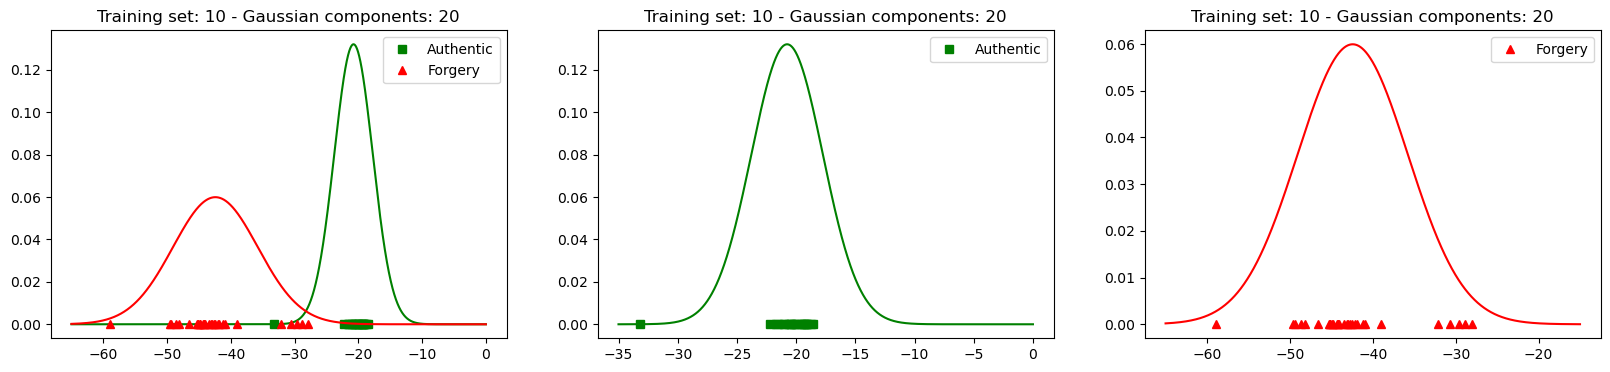

In [15]:
# change this range for your set
x = np.arange(-65, 0, 0.01) # Our lowest score from above is 1: -58.9545

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.figure(figsize=(20,4))


plt.subplot(1,3,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

# Authentic set
x = np.arange(-35, 0, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,3,2)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
    
# Forged (impostor) set
x = np.arange(-65, -15, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,3,3)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

### Parameter #4(Number of Signatures: 10, Number of Gaussian Mixture Components: 40)

In [16]:
# to store all the scores calculated
aScores = []

# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 10
# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40
total_signatures = 30
numForgedSigs = 30

train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    # print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)


fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(diff_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)


# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Std of authentic scores: %.4f' % (aStd))
print('Average of forgery scores: %.4f' % (fMu))
print('Std of forgery scores: %.4f' % (fStd))

0: -46.2347
1: -184.8306
2: -172.4315
3: -56.4594
4: -38.7337
5: -33.8714
6: -39.2701
7: -72.1605
8: -64.0055
9: -52.4865
10: -60.7262
11: -56.9978
12: -58.7069
13: -56.2625
14: -60.3902
15: -61.4453
16: -84.9721
17: -62.9600
18: -53.7419
19: -57.4478
20: -63.2959
21: -57.2122
22: -54.3157
23: -53.7016
24: -56.6432
25: -60.1835
26: -53.4517
27: -56.1143
28: -59.9497
29: -51.0426
Average of authentic scores: -29.4323
Std of authentic scores: 24.5681
Average of forgery scores: -64.6682
Std of forgery scores: 31.8865


Text(0.5, 1.0, 'Training set: 10 - Gaussian components: 40')

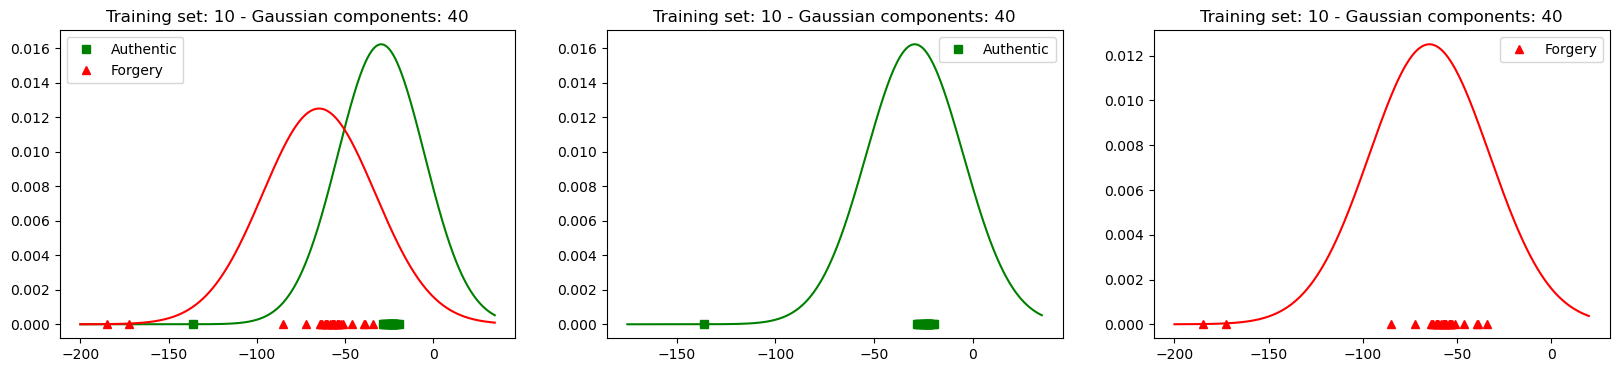

In [36]:
# change this range for your set
x = np.arange(-200, 35, 0.05) # Our lowest score from above is 1: -184.8306

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.figure(figsize=(20,4))


plt.subplot(1,3,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

# Authentic set
x = np.arange(-175, 35, 0.05)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,3,2)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))
    
# Forged (impostor) set
x = np.arange(-200, 20, 0.05)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,3,3)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS))

### Analysis for Impostor Signatures
- The first pair (20, 20) is the default pair given to us in the notebook. The second pair (20, 40) is the same as the first pair but with more Gaussian mixture components. The third pair (10, 20) is the same as the first pair but with less signatures used for training. The fourth pair (10, 40) is the same as the second pair but with less signatures. 
- Despite the change in word choice from exercise 1, the imposter visual plots had varying results with each change to the parameters. When looking at 20 signatures and 20 components, we see very similar plots. This can be explained by the GMM for this scenario would have parameters (means, covariances, weights) that capture the variations within the genuine signatures and account for the potential differences introduced by forgeries. However, as we start to increase the components and training set we start to see more specific differences. It is important to note that the increase in components might lead to overfitting or fine-grained modeling, which can affect how the model represents genuine and forged signatures, especially when dealing with an impostor. We can confirm this change not just visually but also by evaluating the increasing change in forgery score from the imposter. Although the same cannot be said with a change in the number of signatures, where the average scores remain relatively the same. It is important to note that the peak of the curve does get impacted potentially due to a higher/lower sensitivity to individual data points or just biases in parameter estimates. 


**Exercise 3** (2 marks): Consider your plots from Exercise 1 or 2. Formulate a hypothesis $H_0$ about the $\mu$ and $\sigma$ of the entire population of the authentic signatures, and analytically test this hypothesis based on your sample (your 10 or more signatures) given the level of the test significance equal to 0.05 ($\alpha=0.05$, level of confidence: $1-\alpha= 0.95$). Now, change the critical values (choose reasonable values) and evaluate the FRR value.  Evaluate your FRR and FAR. You can do the calculations manually, and include in  your report using the Markdown or taking a photo and adding this photo to the notebook (see Lab 1 on Markdown). 

## All calculations for ex.3 are placed in a PDF file

In [1]:
from IPython.display import IFrame
IFrame("./Exercise 3/exercise3.pdf", width=600, height=300)

## Screenshot of the calculations: 


![image](./Exercise%203/ex3-1.png)
![image](./Exercise%203/ex3-2.png)

In [63]:
NUMTRAININGPATTERNS = 20
NUMGCOMPONENTS = 40

total_signatures = 30
numForgedSigs = 30
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(0, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

0: -16.7502
1: -17.0922
2: -17.0694
3: -16.4889
4: -16.5532
5: -16.8920
6: -16.6211
7: -16.8262
8: -16.2523
9: -17.2118
10: -16.9455
11: -16.4661
12: -16.4494
13: -16.5726
14: -16.1022
15: -16.6358
16: -17.2001
17: -16.5797
18: -16.3813
19: -17.3672
20: -17.6982
21: -17.3676
22: -18.3237
23: -17.2070
24: -18.3587
25: -16.7073
26: -18.4974
27: -17.1073
28: -18.7881
29: -16.7000


#### 0: -16.7502 -> Outside of our interval 
#### 1: -17.0922 -> Outside of our interval 
#### 2: -17.0694 -> Outside of our interval 
#### 3: -16.4889 -> Outside of our interval 
#### 4: -16.5532 -> Outside of our interval 
#### 5: -16.8920 -> Outside of our interval 
#### 6: -16.6211 -> Outside of our interval 
#### 7: -16.8262 -> Outside of our interval 
#### 8: -16.2523 -> Outside of our interval 
#### 9: -17.2118 -> Outside of our interval 
#### 10: -16.9455 -> Outside of our interval 
#### 11: -16.4661 -> Outside of our interval 
#### 12: -16.4494 -> Outside of our interval 
#### 13: -16.5726 -> Outside of our interval 
#### 14: -16.1022 -> Outside of our interval 
#### 15: -16.6358 -> Outside of our interval 
#### 16: -17.2001 -> Outside of our interval 
#### 17: -16.5797 -> Outside of our interval 
#### 18: -16.3813 -> Outside of our interval 
#### 19: -17.3672 -> Outside of our interval 
#### 20: -17.6982 
#### 21: -17.3676 -> Outside of our interval 
#### 22: -18.3237 -> Outside of our interval 
#### 23: -17.2070 -> Outside of our interval 
#### 24: -18.3587 -> Outside of our interval 
#### 25: -16.7073 -> Outside of our interval 
#### 26: -18.4974 -> Outside of our interval 
#### 27: -17.1073 -> Outside of our interval 
#### 28: -18.7881 -> Outside of our interval 
#### 29: -16.7000 -> Outside of our interval 

### Conclusion 
